# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [1]:
# Import of Packages
# import math
import numpy as np
import pandas as pd

# import matplotlib.pyplot as plt
# import random

# Importing the Functions File
import Functions as fn

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [2]:
# Reading the excel file and set it as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [3]:
# Assign Variables with a specific Vector of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Plotting them

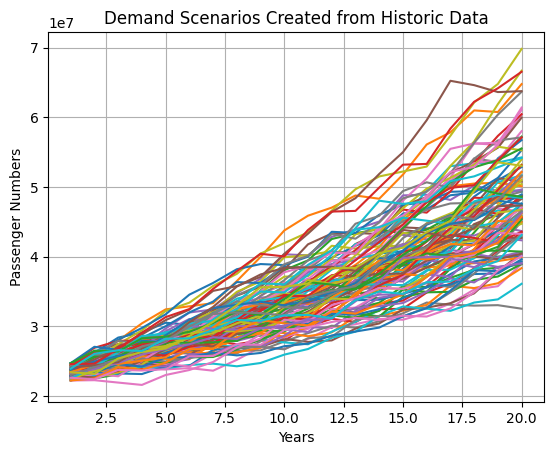

<Figure size 640x480 with 0 Axes>

In [4]:
# Demand at t0
# Dt0 = 22561132
Dt0 = Historic_Demand[-1]
# Steptime [Years]
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100

# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios Created from Historic Data")

## Calculation of the Traditional NPV and ENPV


Inputs for NPV Calculation

In [5]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand for further Calculations
D_rounded = np.ceil(D / 1000000)

Exporting Data (Mainly used for Programming and Cross Checking with Excel)

In [6]:
# Add initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the shape to an Pandas Data Frame
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (if not found in Files a new one is created)
excel_file = "output.xlsx"
# Fill the Data Frame into the Excel File
df_export_2.to_excel(excel_file, index=False)

Creation of a mean Capacity Estimation

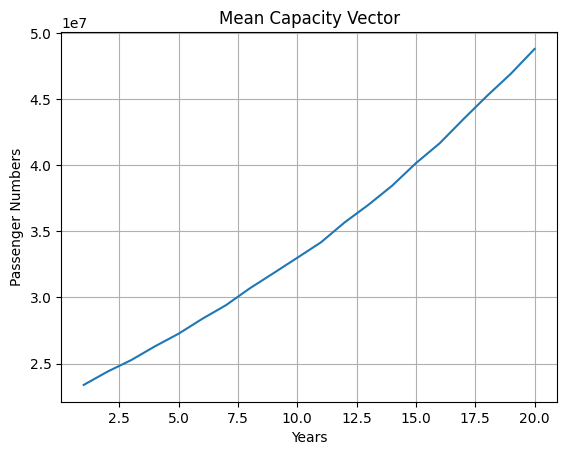

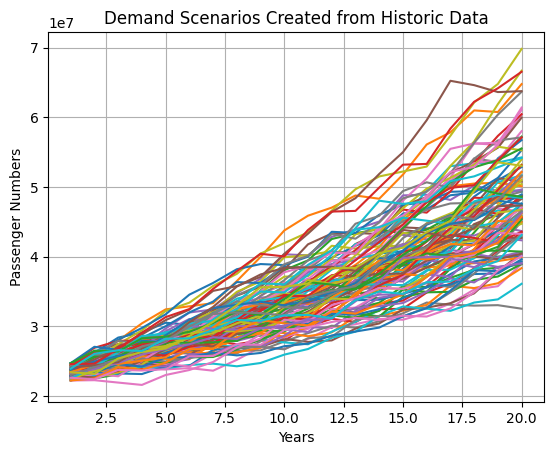

<Figure size 640x480 with 0 Axes>

In [7]:
# Calculating a Mean Scenario for the Estimation of the Capacity Vector
capacity_vector = np.mean(Scenario, axis=0)

# Plotting the Mean Sceanrio as Capacity Vector
fn.Scenario_plot(capacity_vector, Fth, "Mean Capacity Vector")
# Plotting the Demand (For Visual Comparison with the Mean Capacity Vector)
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios Created from Historic Data")

Creation of a Staircase Vector based on the Capacity Estimation

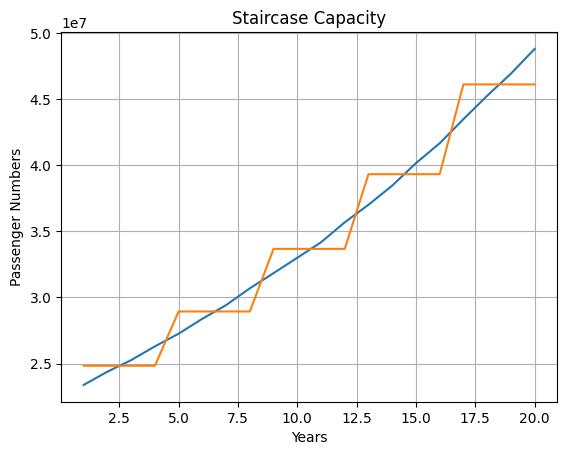

<Figure size 640x480 with 0 Axes>

In [8]:
# Number of Capacity Changes
num_steps = 5
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

# Estiamted Capacity Vector
K_est = staircase_vector
# Rounding the Estiamted Capacity Vector for further Calculations
K_est_rounded = np.ceil(K_est / 1000000)
# Combining the Mean Capacity Vector and the Staircase Capacity Vector for Plotting
Capacity_plot = np.array([capacity_vector, staircase_vector])
# Plotting the Combined Vector for Visual Inspection
fn.Scenario_plot(Capacity_plot, Fth, "Staircase Capacity")

Calling the NPV Calculation Function for Comparsion with the Excel Sheet

In [9]:
# Defined Capacity Vector in the Excel Sheet -> To compare results
K_excel_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

# Calling the NPV Calculatio Function to compare with Excel
NPV_excel = fn.NPV_Calculation(D_rounded, K_excel_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_excel)

Traditional NPVs =  [10572731.12040106 13070225.53281436  8647833.07994977  8772420.50293001
 11793294.92420616  9727415.15161776 10674779.22673821 11163237.964064
 10836127.69309219  9958934.10415602  9978266.22173054 10682435.50630679
  9219852.78809966  7940276.72247566  7903933.92113189 11200555.34240281
  6409485.13526169  6577577.48334979 13235080.76161392 11379354.35375998
 11625685.26447711  7080714.71000716 11135083.30724249  8254367.34690504
 10474488.65755848 11751536.84633225  9513737.14273258  8989848.23451707
 11791315.88113612  8383623.31232915 12315486.68062428 10114494.09283567
  7598027.73946076  9548664.30615707  9980236.50946088  6992504.20175284
  9276217.91375504  8079483.82935754 10832746.38563156 10100784.09151983
  9626335.31004873  9225526.46204946  8964315.05713775 11223709.23403737
 10589368.01327396  9399461.01979063 11176516.90751965 11113420.71745457
 10693141.94415619  5936415.71270165  7428853.27095371  8825701.49394148
  7889371.04439516 10002106.60677

Calculating the ENPV for Comparsion with the Excel Sheet

In [10]:
# Calculating the ENPV for the Excel Capacity Vector
ENPV_excel = np.mean(NPV_excel)
print("Traditional ENPV = ", ENPV_excel)

Traditional ENPV =  9629552.321670514


Calling the NPV Calculation Function for the Estimated Staircase Capacity Vector

In [11]:
# Calling the NPV Calculatio Function
NPV_est = fn.NPV_Calculation(D_rounded, K_est_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_est)

Traditional NPVs =  [11082349.59475417 13070234.66068266  9388180.78992701  9495096.14164352
 11834566.89383078 10403108.69307842 11057217.91900183 11435087.68535198
 11187313.10231877 10472687.59511095 10567527.00862929 10965767.93416973
  9971769.66273165  8694367.80559932  8658025.00425556 11481800.95075052
  7163576.21838536  7331668.56647345 13235089.88948223 11568506.78832192
 11759262.91219648  7834805.79313083 11407712.47834897  9007491.51472055
 10947359.34833669 11812567.86539552 10191913.54934721  9712523.87323058
 11958212.07776024  9126407.68835326 12390261.07283398 10755271.63662548
  8352118.82258442 10188582.39761324 10570166.63308063  7746595.28487651
  9934938.64289533  8833574.91248121 11195830.76675803 10648094.18581426
 10329712.08196287 10019960.39239861  9656191.82198311 11496207.70869153
 10981934.88611889 10078396.09071125 11416188.00081391 11354121.45252719
 10974440.15331349  6690506.79582532  8182944.35407737  9508384.99771096
  8622141.64497404 10588424.484

Calculating the ENPV for the Estimated Staircase Capacity Vector

In [12]:
# Calculating the ENPV for Staircase Capacity Vector
ENPV_est = np.mean(NPV_est)
print("Traditional ENPV = ", ENPV_est)

Traditional ENPV =  10167305.290170291


## Creating a Flexible Capacity Vector

In [13]:
# Initial Capacity
# K0 = 25
K0 = K_est_rounded[0]

# Capacity Increase in the Excel Sheet
deltaK_Flex_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, deltaK_Flex_excel)

In [14]:
# Capacity Increase Vector for Comparison and Increase of Capacity
deltaK_Flex = [5, 8, 10]
# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, deltaK_Flex)

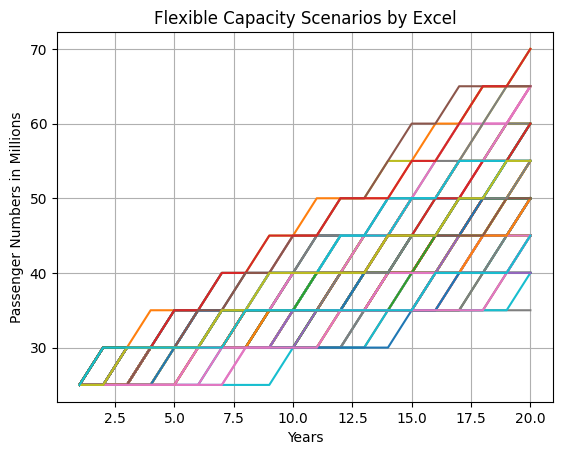

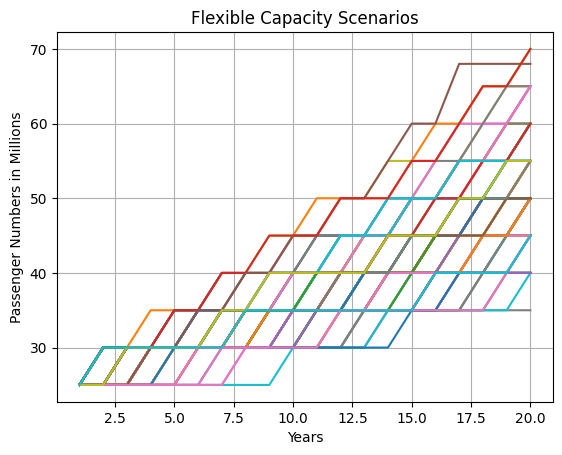

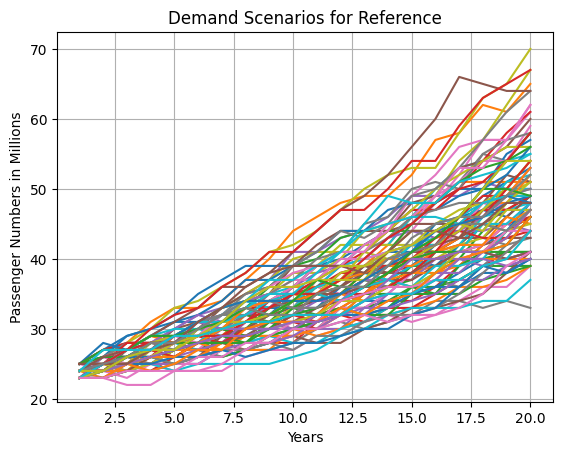

<Figure size 640x480 with 0 Axes>

In [20]:
# Plotting the Flexible Capacity Vectors
fn.Scenario_plot(
    Flexible_Capacity_Excel,
    Fth,
    "Flexible Capacity Scenarios by Excel",
    "Passenger Numbers in Millions",
)
fn.Scenario_plot(
    Flexible_Capacity,
    Fth,
    "Flexible Capacity Scenarios",
    "Passenger Numbers in Millions",
)
# Plotting the Demand (For Visual Comparison with the Flexible Capacity Vector)
fn.Scenario_plot(
    D_rounded, Fth, "Demand Scenarios for Reference", "Passenger Numbers in Millions"
)

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [16]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_excel = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity_Excel, Fth, dt)
print("Flexible Excel NPVs = ", Flex_NPV_excel)

# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("Flexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [10249732.95908877 12288088.51851082  9482939.51491552  9339358.67446084
 11052902.44041037  9792999.75290078 10442834.14010173 11004144.48546999
 10352894.9815008  10114530.6050778  10065830.41414661 10223394.50771824
  9658809.40633217  9057460.75760681  9228827.49847658 10933083.12660865
  8402915.79106693  8102582.6446128  12525845.07783436 10908783.79225472
 11078049.77248847  8790162.71820589 10795999.00527536  9206874.06865946
 10331752.22357859 11338431.5212877   9879436.34369071  9371874.38883756
 11400385.00753274  9179322.53781613 11824396.30024352 10302521.70471131
  8965547.53970089  9775091.91617522 10123718.49511081  8583405.3517236
  9662317.04083019  8775167.81484656 10684988.70779852 10058827.22257905
 10056683.52272999  9811176.94700715  9598181.90618372 10928808.89599743
 10172614.40865777  9780016.75210004 10641353.15483716 10681687.82365325
 10405207.88898     8329305.11835918  8953739.47158015  9417764.22927218
  9222478.56686179 10109358.1

In [17]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity, Fth, dt)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)

# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("Estimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [10249732.95908877 12288088.51851082  9482939.51491552  9339358.67446084
 11052902.44041037  9792999.75290078 10442834.14010173 11004144.48546999
 10352894.9815008  10114530.6050778  10065830.41414661 10223394.50771824
  9658809.40633217  9057460.75760681  9228827.49847658 10933083.12660865
  8402915.79106693  8102582.6446128  12525845.07783436 10908783.79225472
 11078049.77248847  8790162.71820589 10795999.00527536  9206874.06865946
 10331752.22357859 11338431.5212877   9879436.34369071  9371874.38883756
 11400385.00753274  9179322.53781613 11824396.30024352 10302521.70471131
  8965547.53970089  9775091.91617522 10123718.49511081  8583405.3517236
  9662317.04083019  8775167.81484656 10684988.70779852 10058827.22257905
 10056683.52272999  9811176.94700715  9598181.90618372 10928808.89599743
 10172614.40865777  9780016.75210004 10641353.15483716 10681687.82365325
 10405207.88898     8329305.11835918  8953739.47158015  9417764.22927218
  9222478.56686179 

Calculating the new ENPV

In [18]:
print("Excel ENPV = ", ENPV_excel)
print("Traditional ENPV = ", ENPV_est)
print("Flexible ENPV with Excel = ", Flex_ENPV_excel)
print("Flexible ENPV = ", Flex_ENPV_est)
print("If > 0 => Flexible Excel better -> ", Flex_ENPV_excel / ENPV_excel)
print("If > 0 => Flexible better -> ", Flex_ENPV_est / ENPV_est)

Excel ENPV =  9629552.321670514
Traditional ENPV =  10167305.290170291
Flexible ENPV with Excel =  9962559.284468956
Flexible ENPV =  9961228.092394061
If > 0 => Flexible Excel better ->  1.0345817699176978
If > 0 => Flexible better ->  0.9797313848758467


## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [19]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()